# Demo of Regression Analysis (predicting continuously varying values)

### (Working with China's GDP dataset provided by CognitiveClass - can obtain from Worldbank as well)

In [16]:
#PyLab combines the numerical module numpy with the graphical plotting module pyplot
#  pyLab is a convenience module that bulk imports matplotlib. many examples use it but it's not recommended 
#  pyplot (for plotting) and NumPy (for Mathematics and working with arrays) in a single name space

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl                            
import numpy as np
%matplotlib inline

# Get China's GDP data file & plot it
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


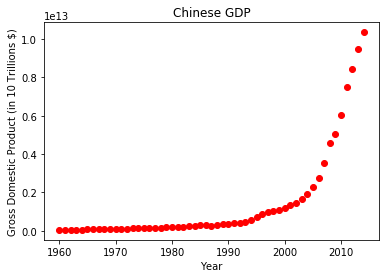

In [3]:
x, y = (df['Year'].values, df['Value'].values)

plt.ylabel('Gross Domestic Product (in 10 Trillions $)')
plt.xlabel('Year')
plt.title('Chinese GDP')
plt.plot(x,y,'ro')

In [4]:
# Print the values in x & y arrays
print("values in array x : \n", x)
print("values in array y : \n", y)

values in array x : 
 [1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]
values in array y : 
 [5.91841165e+10 4.95570502e+10 4.66851785e+10 5.00973033e+10
 5.90622549e+10 6.97091531e+10 7.58794348e+10 7.20570286e+10
 6.99934979e+10 7.87188205e+10 9.15062113e+10 9.85620238e+10
 1.12159814e+11 1.36769878e+11 1.42254742e+11 1.61162492e+11
 1.51627687e+11 1.72349014e+11 1.48382112e+11 1.76856525e+11
 1.89649992e+11 1.94369049e+11 2.03549627e+11 2.28950201e+11
 2.58082147e+11 3.07479586e+11 2.98805793e+11 2.71349773e+11
 3.10722214e+11 3.45957486e+11 3.58973230e+11 3.81454704e+11
 4.24934066e+11 4.42874596e+11 5.62261130e+11 7.32032045e+11
 8.60844098e+11 9.58159425e+11 1.02527690e+12 1.08944711e+12
 1.20526068e+12 1.33223472e+12 1.46190649e+12 1.64992872e+12
 1.94

### Logistic Function (sigmoid) is also described by the equation using 2 parameters ( $\beta_1$ & $\beta_2$ )
### $ \hat{Y} = \frac1{1+e^{(-\beta_1(X-\beta_2)}} $ 
####   - $ \beta_1$: Controls the curve's steepness,
####   - $ \beta_2$: Slides the curve on the x-axis.
 
 #### Useful when the (x,y) range does not have any negative values (plot a function)

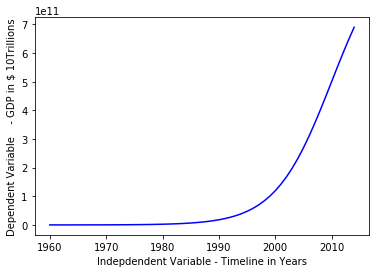

In [8]:
def sigmoid (x, B1, B2):
    y = 1.0 / (1.0 + np.exp(-B1*(x-B2)))
    return y

B1 = .2
B2 = 2010

y_pred = sigmoid(x, B1, B2)

plt.plot(x,y_pred*(10**12), 'b')    # The original scale of GDP is trillions of tens of dollars 10 to power 12 
plt.ylabel('Dependent Variable    - GDP in $ 10Trillions')
plt.xlabel('Indepdendent Variable - Timeline in Years')
plt.show()

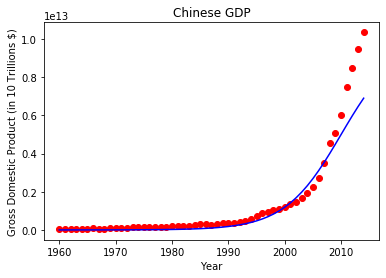

In [9]:
#Overlay the predicted curve & the data curve
plt.ylabel('Gross Domestic Product (in 10 Trillions $)')
plt.xlabel('Year')
plt.title('Chinese GDP')
plt.plot(x,y,'ro')
plt.plot(x,y_pred*(10**13),'b')

In [10]:
# Normalize the (x,y) data to make the scales similar & eliminate the units (y = $Trillions, x = Years)
x_normalized = x/max(x)
y_normalized = y/max(y)

# Print normalized values
print("normalized values in array x : \n", x_normalized)
print("normalized values in array y : \n", y_normalized)


normalized values in array x : 
 [0.97318769 0.97368421 0.97418073 0.97467726 0.97517378 0.97567031
 0.97616683 0.97666336 0.97715988 0.97765641 0.97815293 0.97864945
 0.97914598 0.9796425  0.98013903 0.98063555 0.98113208 0.9816286
 0.98212512 0.98262165 0.98311817 0.9836147  0.98411122 0.98460775
 0.98510427 0.98560079 0.98609732 0.98659384 0.98709037 0.98758689
 0.98808342 0.98857994 0.98907646 0.98957299 0.99006951 0.99056604
 0.99106256 0.99155909 0.99205561 0.99255214 0.99304866 0.99354518
 0.99404171 0.99453823 0.99503476 0.99553128 0.99602781 0.99652433
 0.99702085 0.99751738 0.9980139  0.99851043 0.99900695 0.99950348
 1.        ]
normalized values in array y : 
 [0.0057156  0.00478589 0.00450854 0.00483806 0.00570384 0.00673204
 0.00732793 0.00695878 0.0067595  0.00760213 0.00883705 0.00951846
 0.01083164 0.01320831 0.01373801 0.01556399 0.01464318 0.01664431
 0.01432975 0.01707961 0.01831512 0.01877086 0.01965745 0.02211047
 0.02492384 0.02969431 0.02885665 0.02620514 0.0300

#### Use the Normalized data to fit a curve using curve_fit() method of scipy to calculate optimal parameters

####   $\beta_1,  \beta_2$ are the first two values in optimum parameters matrix

In [12]:
# Use curve_fit of scipy which is a non-linear least squares method to fit our GDP data. 
from scipy.optimize import curve_fit

#Compute OPTIMUM VALUE PARAMETER 'popt', & COVARIANCE PARAMETER'pcov'
popt, pcov = curve_fit(sigmoid, x_normalized, y_normalized)

#print the final parameters
print("Beta_1 = %f, Beta_2 = %f" % (popt[0], popt[1]))

print("Post curve fitting parameters  (popt) of optimum values matrix : ", popt)
print("Post curve fiitting parameters (pcov) of covariance matrix     : ", pcov)


Beta_1 = 690.451711, Beta_2 = 0.997207
Post curve fitting parameters  (popt) of optimum values matrix :  [690.451711     0.99720713]
Post curve fiitting parameters (pcov) of covariance matrix     :  [[ 1.52271498e+03 -2.88118984e-04]
 [-2.88118984e-04  7.25961449e-09]]


In [13]:
#### Plot the fitted curve  & the original data using the parameters
X = x_normalized
Y = sigmoid(X, popt[0], popt[1])

print ("X array : ", X)
print ("Y array : ", Y)

X array :  [0.97318769 0.97368421 0.97418073 0.97467726 0.97517378 0.97567031
 0.97616683 0.97666336 0.97715988 0.97765641 0.97815293 0.97864945
 0.97914598 0.9796425  0.98013903 0.98063555 0.98113208 0.9816286
 0.98212512 0.98262165 0.98311817 0.9836147  0.98411122 0.98460775
 0.98510427 0.98560079 0.98609732 0.98659384 0.98709037 0.98758689
 0.98808342 0.98857994 0.98907646 0.98957299 0.99006951 0.99056604
 0.99106256 0.99155909 0.99205561 0.99255214 0.99304866 0.99354518
 0.99404171 0.99453823 0.99503476 0.99553128 0.99602781 0.99652433
 0.99702085 0.99751738 0.9980139  0.99851043 0.99900695 0.99950348
 1.        ]
Y array :  [6.27401504e-08 8.83960819e-08 1.24543329e-07 1.75472039e-07
 2.47226694e-07 3.48323511e-07 4.90761177e-07 6.91444911e-07
 9.74192840e-07 1.37256282e-06 1.93383520e-06 2.72462407e-06
 3.83878312e-06 5.40854399e-06 7.62020890e-06 1.07362594e-05
 1.51265038e-05 2.13119577e-05 3.00266605e-05 4.23047539e-05
 5.96031388e-05 8.39742276e-05 1.18309216e-04 1.66680593e-

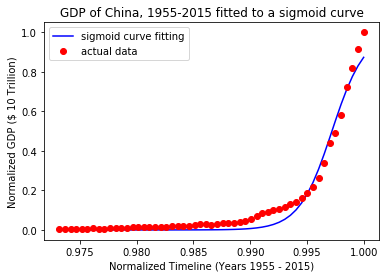

In [14]:
plt.plot(X, Y, 'b', label= 'sigmoid curve fitting')
plt.plot(x_normalized, y_normalized, 'ro', label= 'actual data')
plt.ylabel("Normalized GDP ($ 10 Trillion)")
plt.xlabel("Normalized Timeline (Years 1955 - 2015)")
plt.title('GDP of China, 1955-2015 fitted to a sigmoid curve')
plt.legend(loc="best") #place the legend in the best place of the plot
plt.show()

## We can visualize that the estimated sigmoid curve fits the data well, but how well?
### To determine accuracy we compute  $R^2$ = ( $ 1 - {\frac{Residual Errors Squared}{Mean Errors Squared}}$ )
#### Mean Residual Errors Squared =  mean $ (Y_i - Y_f)^2 $ , 
#### Mean Errors Squared     = mean $ (Y_i - Y_m)^2 $
#### Take the actual data & split into Training & Testing data set
#### (1) Use the Training Data set to fit the sigmoid curve  & compute the fitted values ($Y_f$)
#### (2) Use the Testing   Data set to  ($Y_i$) as is
#### INPUT THE $ Y_f, Y_i $ INTO  r2_score() OF SCIKIT LEARN     

In [15]:
# --- SPLIT THE DATA INTO TRAINING & TESTING DATASETS ---

# Create a Boolean Mask
msk = np.random.rand(len(df)) < 0.8

# Remember to use the normalized data set 
train_x = x_normalized[msk]
train_y = y_normalized[msk]

test_x = x_normalized[~msk]
test_y = y_normalized[~msk]

# Fit the curve using the Training Dataset of normalized values (popt:parameter optimum, pcov:parameters covariance)
popt, pcov = curve_fit(sigmoid, train_x, train_y)

print("popt, (B1, B2)  :", popt)
print("pcov COVARIANCE :", pcov)

# Use the estimated sigmoid function to compute the estimated or fitted values of Y
#Y = sigmoid(X, B1, B2)
Y = sigmoid(test_x, popt[0], popt[1])


# Compute Mean of Absolute Errors, or the Sum of Squares (Mean of Squared Errors) - has to be minimal
print("M.A.E - Mean Absolute Error : %.2f" %  np.mean(np.absolute(Y - test_y)))

# Compute Residual Sum of Squares (Mean of Squared Errors) - has to be minimal
print("M.S.E - Mean Squared Error   : %.2f" %  np.mean((Y - test_y)**2))

from sklearn.metrics import r2_score

# Compute R square using r2_score of SciKit Learn
print("R Square : %.2f" %  r2_score(Y, test_y))

popt, (B1, B2)  : [713.27625282   0.99716637]
pcov COVARIANCE : [[ 2.00367692e+03 -4.41678759e-04]
 [-4.41678759e-04  9.43024004e-09]]
M.A.E - Mean Absolute Error : 0.02
M.S.E - Mean Squared Error   : 0.00
R Square : 0.95
